<a href="https://colab.research.google.com/github/ahmedSadoun/colab-project/blob/main/squeezenetcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/rcmalli/keras-squeezenet.git

  Cloning https://github.com/rcmalli/keras-squeezenet.git to /tmp/pip-req-build-ipil7tym
  Running command git clone -q https://github.com/rcmalli/keras-squeezenet.git /tmp/pip-req-build-ipil7tym
  Created wheel for keras-squeezenet: filename=keras_squeezenet-0.4-cp37-none-any.whl size=4423 sha256=7fdea6d8d21b1c16da0322ac27ad2950f186528d90b46da432a8426fde33136a
  Stored in directory: /tmp/pip-ephem-wheel-cache-kmxxfhiz/wheels/15/75/ed/45fffbc76d921a5be07af533b774b35bbf40551334c51af91f
Successfully built keras-squeezenet


In [ ]:
!pip install tensorflow==1.14.0rc1

     |████████████████████████████████| 109.3MB 91kB/s 
     |████████████████████████████████| 51kB 9.6MB/s 
     |████████████████████████████████| 491kB 53.7MB/s 
     |████████████████████████████████| 3.2MB 33.2MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
!pip install q keras==2.1.1

     |████████████████████████████████| 307kB 18.7MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.1 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import numpy as np
from keras_squeezenet import SqueezeNet
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image


In [ ]:
import cv2
import gc
import numpy as np
from keras_squeezenet import SqueezeNet
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import time
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from keras.layers import *
from sklearn.metrics import accuracy_score
from keras.applications import VGG19
from tqdm import tqdm
from keras import backend as K
from tqdm import tqdm


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [01:49<00:00, 118MB/s] 
100% 5.20G/5.20G [01:49<00:00, 51.0MB/s]


In [ ]:
#extracte data from zipfile
import zipfile
zf = "/content/skin-cancer-mnist-ham10000.zip"
target_dir = "/content/skin-cancer-mnist"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [ ]:
from numpy.random import seed
seed(101)
import tensorflow as tf



import pandas as pd
import numpy as np
#import keras
#from keras import backend as K

import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

# os.listdir('../input')
os.listdir("/content/skin-cancer-mnist")

['hmnist_28_28_L.csv',
 'HAM10000_images_part_2',
 'ham10000_images_part_1',
 'hmnist_8_8_L.csv',
 'hmnist_28_28_RGB.csv',
 'HAM10000_metadata.csv',
 'hmnist_8_8_RGB.csv',
 'ham10000_images_part_2',
 'HAM10000_images_part_1']

In [ ]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)

#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 7 folders inside 'base_dir':

# train_dir
    # nv
    # mel
    # bkl
    # bcc
    # akiec
    # vasc
    # df
 # val_dir
    # nv
    # mel
    # bkl
    # bcc
    # akiec
    # vasc
    # df
    # create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)
# [CREATE FOLDERS INSIDE THE TRAIN, VALIDATION AND TEST FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)
# create new folders inside val_dir
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [ ]:
# View the new directory structure
# print(os.listdir('base_dir'))
# print(os.listdir('base_dir/train_dir'))
# print(os.listdir('base_dir/val_dir'))

In [ ]:
df_data = pd.read_csv('/content/skin-cancer-mnist/HAM10000_metadata.csv')

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:

# this will tell us how many images are associated with each lesion_id
df = df_data.groupby('lesion_id').count()

# now we filter out lesion_id's that have only one image associated with it
df = df[df['image_id'] == 1]

df.reset_index(inplace=True)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000001,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1


In [ ]:

# here we identify lesion_id's that have duplicate images and those that have only
# one image.

def identify_duplicates(x):
    
    unique_list = list(df['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df_data['duplicates'] = df_data['lesion_id']
# apply the function to this new column
df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)# 

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates


In [ ]:

df_data['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [ ]:

# now we filter out images that don't have duplicates
df = df_data[df_data['duplicates'] == 'no_duplicates']

print(df.shape)
df.head()

(5514, 8)


,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,no_duplicates
15,HAM_0007207,ISIC_0031326,bkl,histo,65.0,male,back,no_duplicates
20,HAM_0006071,ISIC_0032343,bkl,histo,70.0,female,face,no_duplicates
33,HAM_0005612,ISIC_0024981,bkl,histo,80.0,male,scalp,no_duplicates
34,HAM_0005388,ISIC_0027815,bkl,histo,80.0,male,chest,no_duplicates


In [ ]:
# df['dx']

In [ ]:

# now we create a val set using df because we are sure that none of these images have augmented duplicates in the train set
y = df['dx']
_, df_val = train_test_split(df, test_size=0.17, random_state=101, stratify=y)

print(df_val.shape)
df_val.head()

(938, 8)


,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
9446,HAM_0007333,ISIC_0033614,nv,consensus,40.0,male,unknown,no_duplicates
5199,HAM_0005819,ISIC_0025111,nv,follow_up,45.0,male,trunk,no_duplicates
6140,HAM_0004336,ISIC_0031760,nv,follow_up,45.0,male,abdomen,no_duplicates
3595,HAM_0006385,ISIC_0026733,nv,follow_up,50.0,female,trunk,no_duplicates
3419,HAM_0002080,ISIC_0029619,nv,follow_up,45.0,female,lower extremity,no_duplicates


In [ ]:

df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [ ]:

# This set will be df_data excluding all rows that are in the val set

# This function identifies if an image is part of the train
# or val set.
def identify_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

# identify train and val rows


# create a new colum that is a copy of the image_id column
df_data['train_or_val'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)
# filter out train rows
df_train = df_data[df_data['train_or_val'] == 'train']


# print(len(df_train))
# print(len(df_val))

In [ ]:

df_train['dx'].value_counts()

nv       5954
mel      1074
bkl      1024
bcc       484
akiec     301
vasc      131
df        109
Name: dx, dtype: int64

In [ ]:

df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [ ]:
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates,train_or_val
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates,train
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates,train
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates,train
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates,train
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates,train


In [ ]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [ ]:
# Get a list of images in each of the two folders
folder_1 = os.listdir('/content/skin-cancer-mnist/ham10000_images_part_1')
folder_2 = os.listdir('/content/skin-cancer-mnist/HAM10000_images_part_2')

# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('/content/skin-cancer-mnist/HAM10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('/content/skin-cancer-mnist/HAM10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('/content/skin-cancer-mnist/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('/content/skin-cancer-mnist/HAM10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


In [ ]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
1074
1024
484
301
131
109


In [ ]:

# note that we are not augmenting class 'nv'
class_list = ['mel','bkl','bcc','akiec','vasc','df']


for item in class_list:

    # We are creating temporary directories here because we delete these directories later
    # create a base dir
    
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image ：base_dir/train_dir/
            src = os.path.join('base_dir/train_dir/' + img_class, fname)
            # destination path to image ：aug_dir/img_dir/
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


            
    # point to a dir containing the images and not to the images themselves
  
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Create a data generator(keras)
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)



    # Generate the augmented images and add them to the training folders
    
    ###########
    
    num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
    ###########
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 1074 images belonging to 1 classes.
Found 1024 images belonging to 1 classes.
Found 484 images belonging to 1 classes.
Found 301 images belonging to 1 classes.
Found 131 images belonging to 1 classes.
Found 109 images belonging to 1 classes.


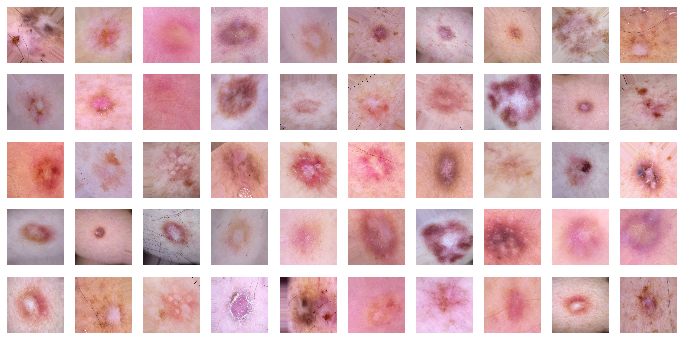

In [ ]:
# plots images with labels within jupyter notebook
# source: https://github.com/smileservices/keras_utils/blob/master/utils.py

def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
plots(imgs, titles=None) # titles=labels will display the image labels

In [ ]:
train_path = '/content/base_dir/train_dir'
valid_path = '/content/base_dir/val_dir'

num_train_samples = len(df_train)#9077
num_val_samples = len(df_val)#938
train_batch_size = 10
val_batch_size = 10
image_size = 227

train_steps = np.ceil(num_train_samples / train_batch_size)#908
val_steps = np.ceil(num_val_samples / val_batch_size)#94

# print(num_train_samples)

In [ ]:
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import *
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from keras.callbacks import *
import gc
import keras
from keras.layers import *
from keras import backend as K
import keras
#from tensorflow.python.keras import Sequential

In [ ]:
!pip install h5py pyyaml

In [ ]:

datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),# 224*224
                                            batch_size=train_batch_size)# 10

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
# 测试集不需要打乱
test_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=1,
                                            shuffle=False)

Found 38569 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [ ]:

#store the accuracy
final_result=[]
#store history
history=[]
#store predictions
predictions=[]
#store answers
answers=[]
#store time taken
times=[]

#loading model
K.clear_session()
mod=SqueezeNet(include_top=False, weights='imagenet',input_shape=(227, 227, 3))
#out_1=mod.layers[-5]


#adding global pooling layer to decrease dimension
gbl=GlobalAveragePooling2D()(mod.output)
model = Sequential()
model.add(Dense(32, input_shape=(16,)))
out=Dense(7,activation='softmax')(gbl)
model=Model(inputs=mod.input,outputs=out)

model.compile(optimizer=Adam(3e-4), 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)
#learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)


callbacks_list = [early]



n_training_samples = len(train_batches)
n_validation_samples = len(valid_batches)

validationsteps=n_validation_samples/32





epoch=30
#loop through each fold
#for index in tqdm(range(1,6)):
  

#set all layers to non trainable


#learning rate schedular

#fitting the model 
#timing
start=time.time()
hist=model.fit_generator(train_batches,steps_per_epoch=n_training_samples//32,epochs=epoch,validation_data=valid_batches,validation_steps=validationsteps
                      , callbacks=callbacks_list
                          )
                        
                      
end=time.time()
times.append(end-start)


Epoch 1/30
120/120 [==============================] - 72s 601ms/step - loss: 2.0193 - acc: 0.2242 - val_loss: 0.9574 - val_acc: 0.7667
Epoch 2/30
120/120 [==============================] - 69s 579ms/step - loss: 1.6890 - acc: 0.3100 - val_loss: 0.9731 - val_acc: 0.7333
Epoch 3/30
120/120 [==============================] - 70s 582ms/step - loss: 1.5052 - acc: 0.3825 - val_loss: 0.7298 - val_acc: 0.8000
Epoch 4/30
120/120 [==============================] - 69s 578ms/step - loss: 1.3984 - acc: 0.4483 - val_loss: 0.8812 - val_acc: 0.6667
Epoch 5/30
120/120 [==============================] - 69s 578ms/step - loss: 1.3387 - acc: 0.4558 - val_loss: 0.6954 - val_acc: 0.8000
Epoch 6/30
120/120 [==============================] - 69s 575ms/step - loss: 1.2519 - acc: 0.5025 - val_loss: 0.7142 - val_acc: 0.8333
Epoch 7/30
120/120 [==============================] - 69s 578ms/step - loss: 1.1528 - acc: 0.5408 - val_loss: 0.4498 - val_acc: 0.9333
Epoch 8/30
120/120 [==============================] - 6

In [ ]:
model.save('/content/drive/MyDrive/project models/squeezenercancer.h5')

In [ ]:
import keras


model=keras.models.load_model("/content/drive/MyDrive/project models/squeezenercancer.h5")



In [ ]:

score, acc = model.evaluate(test_batches,verbose=1,batch_size=64)

print('Test score:', score)
print('Test accuracy:', acc)

938/938 [==============================] - 44s 12ms/step - loss: 0.4945 - accuracy: 0.8326
Test score: 0.4945186376571655
Test accuracy: 0.8326225876808167
